In [1]:
#https://geoffboeing.com/2016/11/osmnx-python-street-networks/
#tutorial for beginners to setup python and osmnx
#https://richardbeare.github.io/GeospatialStroke/
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx as ox
import pandas as pd
import networkx as nx
ox.config(use_cache=True)

Unable to open EPSG support file gcs.csv.  Try setting the GDAL_DATA environment variable to point to the directory containing EPSG csv files.


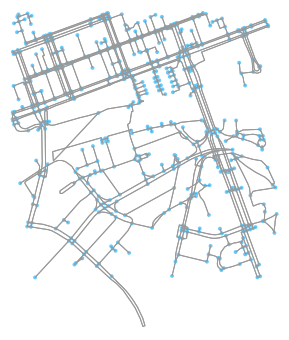

(<Figure size 460.677x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ad2fdd3278>)

In [2]:
%matplotlib inline

#Westin Hotel
#G = ox.graph_from_address('The Westin Hotel, Brisbane, Queensland', distance=500, network_type='walk')
#Langham hotel
G = ox.graph_from_address('Langham Hotel, Melbourne, Victoria', distance=500, network_type='walk')
ox.plot_graph(G)
#route = nx.shortest_path(G, origin, destination)
#ox.plot_graph_route(G, route)

In [3]:
basic_stats = ox.basic_stats(G)
print(basic_stats['circuity_avg'])
extended_stats = ox.extended_stats(G, bc=True)
print(extended_stats['betweenness_centrality_avg'])

1.0687863653735923
0.023818078067926154


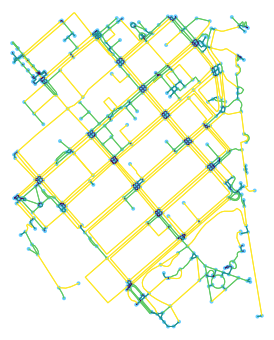

(<Figure size 387.565x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x14d63304390>)

In [4]:
#plot longest & shortest block around Westin Hotel
ec = ox.get_edge_colors_by_attr(G, attr='length')
ox.plot_graph(G, edge_color=ec)

In [5]:
#save in data directory
ox.save_graphml(G, filename='WestinHotel.graphml')

In [6]:
#https://automating-gis-processes.github.io/2017/lessons/L7/network-analysis.html
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)
edges.columns

Index(['access', 'bridge', 'geometry', 'highway', 'key', 'lanes', 'length',
       'maxspeed', 'name', 'oneway', 'osmid', 'service', 'tunnel', 'u', 'v'],
      dtype='object')

In [7]:
edges['maxspeed'].value_counts()

40    340
50     14
10      4
Name: maxspeed, dtype: int64

In [8]:
nodes = ox.graph_to_gdfs(G, nodes=True, edges=False)
nodes.columns

Index(['highway', 'osmid', 'x', 'y', 'geometry'], dtype='object')

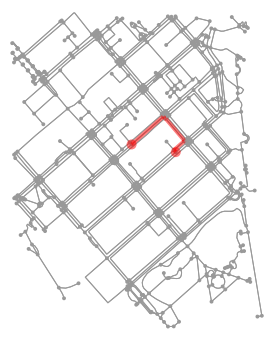

(<Figure size 387.565x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x14d61f45908>)

In [9]:
#https://blog.ouseful.info/2018/06/29/working-with-openstreetmap-roads-data-using-osmnx/
origin=ox.utils.geocode('147 Charlotte St, Brisbane, Queensland') #Queensland Health
origin_node=ox.get_nearest_node(G,origin)
destination= ox.utils.geocode('The Westin Hotel, Brisbane, Queensland')
destination_node=ox.get_nearest_node(G,destination)
route = nx.shortest_path(G, origin_node, destination_node)
ox.plot_graph_route(G, route)

In [10]:
m=ox.plot_route_folium(G, route, route_width=5, route_color='red',tiles='Stamen Terrain',popup_attribute='name' )
m.save('webmap/westinhotel.html')

In [11]:
m